In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

import functions

In [3]:
pip = functions.PiPlus()

In [9]:
#comp = pd.read_csv('COMPASS_d_2009.csv')
df = pd.read_csv('HERMES_p_2009.csv')
#df = pd.concat([comp, herm])

In [6]:
pd.set_option('display.max_rows', 1000)

In [7]:
np.unique(herm['hadron'])

array(['k+', 'k-', 'pd', 'pi+', 'pi-', 'pi0'], dtype=object)

In [10]:
pipdata = df.loc[df['hadron'] == 'pi+', :]

In [11]:
pipkins = np.array(pipdata[['x', 'z', 'phT', 'Q2']])

In [14]:
pip.sivers(pipkins, 2, 2, 2, 2, 2)

array([0.00118276, 0.0018563 , 0.00257789, 0.00342676, 0.00434736,
       0.00515898, 0.00591185, 0.0018929 , 0.00173056, 0.00188212,
       0.0022995 , 0.00320175, 0.00496599, 0.00832673, 0.00069762,
       0.001344  , 0.00177849, 0.00213728, 0.00273366, 0.00405225,
       0.00729173])

In [15]:
pars, cov = optimize.curve_fit(pip.sivers, pipkins, pipdata['Siv'],
                               sigma=pipdata['tot_err'], method='lm')

/home/nick/Documents/Sivers/functions.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return n * x**a * (1 - x)**b * (((a + b)**(a + b))/(a**a * b**b))


Parameters in order of: Nu, au, bu, Ndbar, adbar, bdbar, m1

In [16]:
pars

array([2.95463751e+04, 5.29404244e-01, 8.07429012e-01, 2.86703266e+04,
       8.06536381e+03])

In [17]:
xdepend = pipdata.loc[pipdata['1D_dependence'] == 'x', :]

In [18]:
xdependkins = np.array(xdepend[['x', 'z', 'phT', 'Q2']])

In [19]:
yhat = pip.sivers(xdependkins, *pars)

In [20]:
np.sum(((xdepend['Siv'] - yhat)/xdepend['tot_err']) ** 2)

9.477341457690809

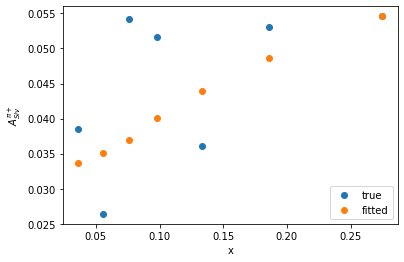

In [21]:
plt.scatter(xdepend['x'], xdepend['Siv'], label='true')
plt.scatter(xdepend['x'], yhat, label='fitted')
plt.xlabel('x')
plt.ylabel('$A^{\pi+}_{Siv}$')
plt.legend()
plt.show()

# Check $\chi^2$

In [39]:
def chisquare(y, yhat, err):
    return np.sum(((y - yhat)/err)**2)

In [40]:
herm['hadron'] = pd.factorize(herm['hadron'])[0]

In [41]:
kinsandflag = np.array(herm[['x', 'z', 'phT', 'Q2', 'hadron']])

In [53]:
herm

,hadron,Q2,x,y,z,phT,Siv,stat,sys,tot_err,1D_dependence
0,0,2.423,0.086,0.592,0.234,0.346,0.0333,0.0050,0.0034,0.006046,z
1,0,2.428,0.094,0.551,0.303,0.377,0.0365,0.0057,0.0052,0.007716,z
2,0,2.425,0.097,0.528,0.373,0.403,0.0348,0.0067,0.0070,0.009690,z
3,0,2.418,0.099,0.514,0.447,0.429,0.0463,0.0075,0.0090,0.011715,z
4,0,2.411,0.100,0.504,0.523,0.453,0.0577,0.0096,0.0110,0.014600,z
5,0,2.400,0.101,0.494,0.593,0.465,0.0623,0.0113,0.0128,0.017074,z
6,0,2.385,0.103,0.478,0.663,0.465,0.0803,0.0132,0.0146,0.019682,z
7,0,1.281,0.036,0.707,0.336,0.489,0.0385,0.0088,0.0010,0.008857,x
8,0,1.631,0.056,0.569,0.356,0.409,0.0264,0.0071,0.0017,0.007301,x
9,0,2.017,0.076,0.513,0.367,0.372,0.0542,0.0078,0.0024,0.008161,x


In [57]:
experiment='HERMES_p_2009.csv'
hadron = ['pi+', 'pi-', 'pi0']
dependence = ['x', 'z', 'phT']
df = pd.read_csv(experiment)
subdf = df.loc[df['hadron'].isin(hadron) & df['1D_dependence'].isin(dependence), :]
kinsandflag = np.array(subdf[['x', 'z', 'phT', 'Q2', 'hadron']])

In [ ]:
params = {'Nu':, Nd, Ns, Nubar, Ndbar, Nsbar, au, ad, as0, bu, bd, bs, m1}

In [ ]:
allpions.siversAll(kinsandflag, )

In [47]:
def chi2forset(experiment, hadron, dependence, listofparams):
    df = pd.read_csv(experiment)
    subdf = df.loc[df['hadron'].isin(hadron) & df['1D_dependence'].isin(dependence), :]
    kinsandflag = np.array(subdf[['x', 'z', 'phT', 'Q2']])
    print(kinsandflag.shape)
    if hadron == 'pi+':
        func = functions.PiPlus('HERMES_p_2009.csv')
        yhat = func.sivers(kinsandflag, *listofparams)
    return chisquare(subdf['Siv'], yhat, subdf['tot_err'])

In [44]:
testa0 = functions.Hadron(kperp2avg=1, pperp2avg=1)

In [45]:
testa0.A0(1, 1, 1)

0.04757906170651974

In [48]:
chi2forset('HERMES_p_2009.csv', 'pi+', 'x', [1, 1, 1, 1, 1])

(7, 4)


151.9885684127162

In [ ]:
chisquare(herm.loc[herm['hadron'] < 3, 'Siv'], yhat, herm.loc[herm['hadron'] < 3, 'tot_err'])